In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

In [2]:
def add_pi0_l1_to_sym_mesh(q1, q2):
    extSSDpath = getExternalSSDpath()
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
    fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}.npz')
    xgrid_pi, ygrid_l = np.mgrid[0.0:0.5:complex(0,51), 0.0:1.0:complex(0,101)]
    fsMeshAmp = np.empty([3, 51, 101])
    # get solutions at pi == 0.0:
    pi = 0.0
    ls = ygrid_l[0]
    fsp0 = [[1.0, ], [0.0, ], [0.0, ]]
    for l in ls[1:-1]:
        call(f'python f0poly_sols_clean.py {pi} {pi} {q1} {q2} {l} -v > sols.dat', shell=True)
        sols = []
        with open('sols.dat', 'r') as file:
            for line in file.readlines():
                sols_i = [abs(float(f)) for f in line.split()]
                sols.append(sols_i)
        for i in range(3):
            fsp0[i].append(sols[1][i])
    fsp0[0].append(1/q2)
    fsp0[1].append(0.0)
    fsp0[2].append(1-1/q2)
    for i in range(3):
        fsMeshAmp[i][0] = np.array(fsp0[i])
        fsMeshAmp[i][1:,0:-1] = fsMesh['fs'][i]
    # add l 1 to the grid:
    fsMeshAmp[0][1:,-1] = np.array([1/q2]*50)
    fsMeshAmp[1][1:,-1] = np.array([0]*50)
    fsMeshAmp[2][1:,-1] = np.array([1-1/q2]*50)
    np.savez(f'{path}/map_sym_q1_{q1}_q2_{q2}_Amp_pi0_l1.npz', x=xgrid_pi, y=ygrid_l, fs=fsMeshAmp)

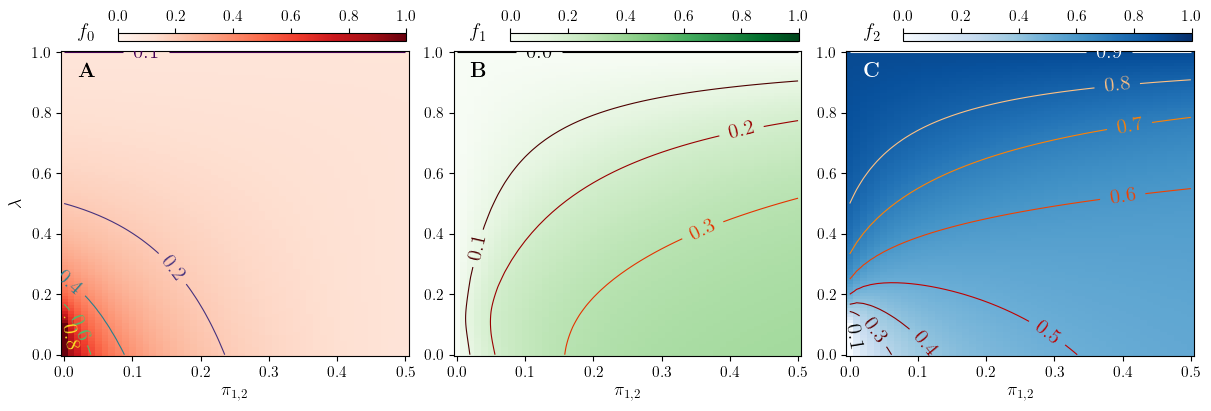

In [32]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

# add pi 0 & l 1 to the grid
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}_Amp_pi0_l1.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]

fig, ax = plt.subplots(1,3,figsize=(12, 4), constrained_layout=True)

for i in range(3):
    ax[i].set_xlim(-0.005, 0.505)
    ax[i].set_ylim(-0.005, 1.005)
    ax[i].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

contour_levels = {'f0':[0.1, 0.2, 0.4, 0.6, 0.8],
                  'f1':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                  'f2':[0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8999999]}

fs_cmaps = {'f0':'Reds', 'f1':'Greens', 'f2':'Blues'}
fs_labels_xpos = {'f0':0.06, 'f1':0.387, 'f2':0.715}
fs_labels_cbar = {'f0':r'\textbf{$f_0$}', 'f1':r'$f_1$', 'f2':r'$f_2$'}
fs_labels_fig = {'f0':r'$\textbf{A}$', 'f1':r'$\textbf{B}$', 'f2':r'$\textbf{C}$'}

cmap = 'viridis'
cmap = 'gist_heat'
for i,f in enumerate(['f0', 'f1', 'f2']):
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], vmin =0, vmax =1, cmap=fs_cmaps[f], shading='nearest', rasterized=True)
    cmap = 'viridis' if f == 'f0' else 'gist_heat'
    con = ax[i].contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], levels=contour_levels[f], linewidths=0.8, cmap = cmap)
    fig.colorbar(im, ax=ax[i], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
    # ax[i].text(0.06, 1.1, fr'\textbf{{{fs_labels[f]}}}', transform=ax[i].transAxes)
    ax[i].clabel(con)
    fig.text(fs_labels_xpos[f], 0.92, fs_labels_cbar[f])
    if f == 'f0' or f == 'f1':
        fig.text(fs_labels_xpos[f], 0.82, fs_labels_fig[f])
    else:
        fig.text(fs_labels_xpos[f], 0.82, fs_labels_fig[f], color='xkcd:white')

fig.savefig(f'fs_cmaps_isolines_sym_pi_q1_{q1}_q2_{q2}.pdf')

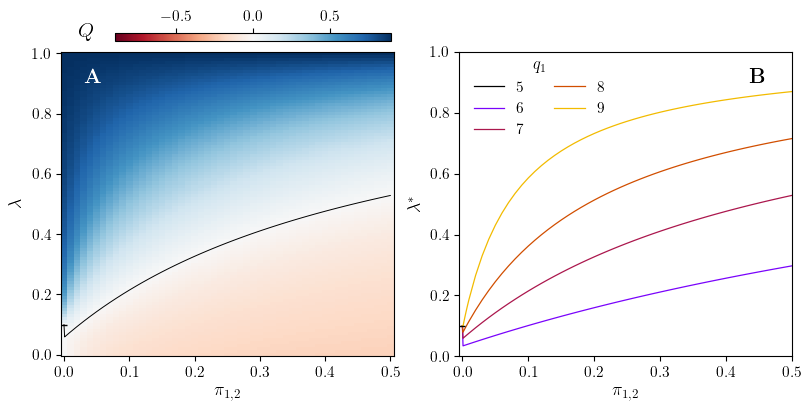

In [20]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

# add pi 0 & l 1 to the grid
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}_Amp_pi0_l1.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]

fig, ax = plt.subplots(1,2,figsize=(8, 4), constrained_layout=True)

maxval = np.max(abs(Qmesh))
zLim = [-maxval, maxval]
im = ax[0].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1], rasterized=True)
fig.colorbar(im, ax=ax[0], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
# add the pi = 0.0 point to the tline:
tline.loc[-1] = [0.0, 0.1]
tline.index = tline.index + 1
tline = tline.sort_index()
ax[0].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.7)
# marker to signal the special behavior at pi=0:
ax[0].plot(0.0, 0.1, color='xkcd:black', marker='_', markersize=5)
# tline = tline.query('pi >= 0.01')
ax[0].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')
fig.text(0.09, 0.92, '$Q$')


q1s, q2 = [5, 6,7,8,9], 10
colors = plt.cm.gnuplot(np.linspace(0,0.9,len(q1s)))
x = 2
for q1,c in zip(q1s, colors):
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline.loc[-1] = [0.0, 0.1]
    tline.index = tline.index + 1
    tline = tline.sort_index()
    ax[1].plot(tline['pi'], tline['lambda'], color=c, lw=0.9, label=f'{q1}')
# marker to signal the special behavior at pi=0:
ax[1].plot(0.0, 0.1, color='xkcd:black', marker='_', markersize=5)
ax[1].set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda^*$', xlim=(-0.005,0.5), ylim=(0,1)) 
ax[1].legend(title=r'$q_1$', loc=(0.025,0.7), fontsize=11, title_fontsize=12, ncols=2, frameon=False)
ax[0].text(0.07,0.9, r'$\textbf{A}$', color='xkcd:white', transform=ax[0].transAxes)
ax[1].text(0.87,0.9, r'$\textbf{B}$', transform=ax[1].transAxes)
fig.savefig(f'Q_cmap_and_Tlines_sym_q2_{q2}.pdf')

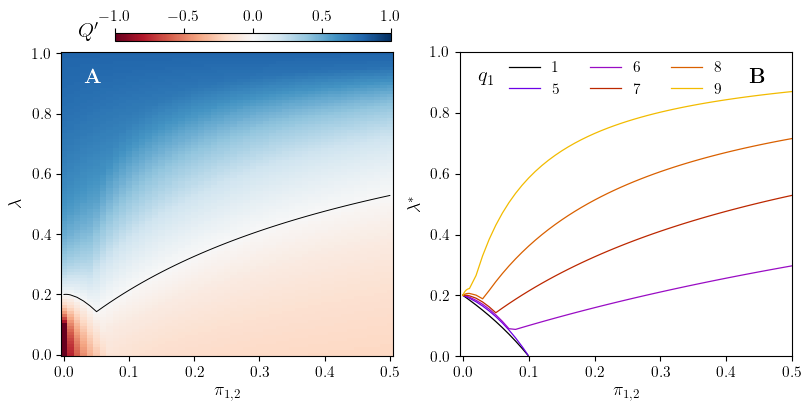

In [4]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

# add pi 0 & l 1 to the grid
x = 2
q1, q2 = 7, 10
fsMesh = np.load(f'{path}/map_sym_q1_{q1}_q2_{q2}_Amp_pi0_l1.npz')

# f01 = np.maximum(fsMesh['fs'][0], fsMesh['fs'][1])
# QmodMesh = fsMesh['fs'][2] - x*f01

f01 = np.maximum(fsMesh['fs'][0], x*fsMesh['fs'][1])
QmodMesh = fsMesh['fs'][2] - f01

fig, ax = plt.subplots(1,2,figsize=(8, 4), constrained_layout=True)

maxval = np.max(abs(QmodMesh))
zLim = [-maxval, maxval]
im = ax[0].pcolormesh(fsMesh['x'], fsMesh['y'], QmodMesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1], rasterized=True)
fig.colorbar(im, ax=ax[0], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
# tline = pd.read_csv(f'{path}/Tline_Qmod_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
tline = pd.read_csv(f'{path}/Tline_Qmod2_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
# tline = tline.query('pi >= 0.01')
tline.loc[-1] = [0.0, 0.2]
tline.index = tline.index + 1
tline = tline.sort_index()
ax[0].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.7)
ax[0].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')
fig.text(0.09, 0.92, "$Q'$")


# q1s, q2 = [1,2,3, 4, 5, 6,7,8,9], 10
q1s, q2 = [1, 5, 6, 7, 8, 9], 10
colors = plt.cm.gnuplot(np.linspace(0,0.9,len(q1s)))
x = 2
for q1,c in zip(q1s, colors):
    # tline = pd.read_csv(f'{path}/Tline_Qmod_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline = pd.read_csv(f'{path}/Tline_Qmod2_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline.loc[-1] = [0.0, 0.2]
    tline.index = tline.index + 1
    tline = tline.sort_index()
    ax[1].plot(tline['pi'], tline['lambda'], color=c, lw=0.9, label=f'{q1}')
ax[1].set(xlabel=r'$\pi_{1,2}$', ylabel=r'$\lambda^*$', xlim=(-0.005,0.5), ylim=(0,1))
# fig.legend(loc=(0.65, 0.87), fontsize=11, title_fontsize=12, ncols=3, frameon=False)
# fig.text(0.61, 0.94, r'$q_1$')
fig.legend(loc=(0.62, 0.75), fontsize=11, title_fontsize=12, ncols=3, frameon=False)
fig.text(0.59, 0.81, r'$q_1$')

ax[0].text(0.07,0.9, r'$\textbf{A}$', color='xkcd:white', transform=ax[0].transAxes)
ax[1].text(0.87,0.9, r'$\textbf{B}$', transform=ax[1].transAxes)

# fig.savefig(f'Qmod_cmap_and_Tlines_sym_q2_{q2}.pdf')
fig.savefig(f'Qmod2_cmap_and_Tlines_sym_q2_{q2}.pdf')

# Asymmetric scenario

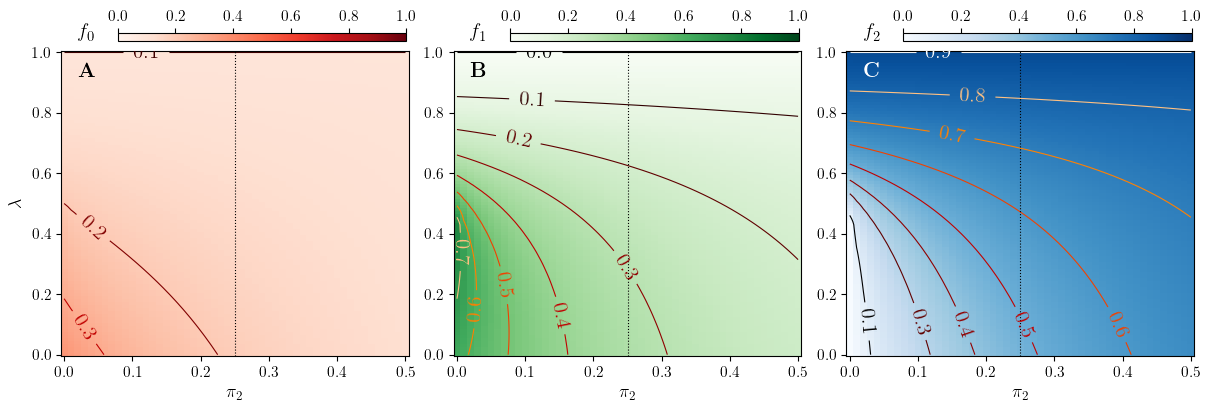

In [33]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

x = 2
pi1, q1, q2 = 0.25, 7, 10
# fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}_Amp_pi20_l1.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]
sumXY = fsMesh['x'] + fsMesh['y']

fig, ax = plt.subplots(1,3,figsize=(12, 4), constrained_layout=True)

for i in range(3):
    ax[i].set_xlim(-0.005, 0.505)
    ax[i].set_ylim(-0.005, 1.005)
    ax[i].set_xlabel('$\pi_{2}$')
ax[0].set_ylabel('$\lambda$')

contour_levels = {'f0':[0.0, 0.1, 0.2, 0.3, 0.4, 0.6],
                  'f1':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                  'f2':[0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8999999]}

fs_cmaps = {'f0':'Reds', 'f1':'Greens', 'f2':'Blues'}
fs_labels_xpos = {'f0':0.06, 'f1':0.387, 'f2':0.715}
fs_labels_cbar = {'f0':r'\textbf{$f_0$}', 'f1':r'$f_1$', 'f2':r'$f_2$'}
fs_labels_fig = {'f0':r'$\textbf{A}$', 'f1':r'$\textbf{B}$', 'f2':r'$\textbf{C}$'}

for i,f in enumerate(['f0', 'f1', 'f2']):
    im = ax[i].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], vmin =0, vmax =1, cmap=fs_cmaps[f], shading='nearest', rasterized=True)
    cmap = 'gist_heat'
    # cmap = 'viridis'
    con = ax[i].contour(fsMesh['x'], fsMesh['y'], fsMesh['fs'][i], levels=contour_levels[f], linewidths=0.8, cmap = cmap)
    fig.colorbar(im, ax=ax[i], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
    ax[i].clabel(con)
    ax[i].axvline(pi1, ls=':', color='xkcd:black', lw=0.8)
    fig.text(fs_labels_xpos[f], 0.92, fs_labels_cbar[f])
    c = 'xkcd:white' if f == 'f2' else 'xkcd:black'
    fig.text(fs_labels_xpos[f], 0.82, fs_labels_fig[f], color=c)

fig.savefig(f'fs_cmaps_isolines_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.pdf')

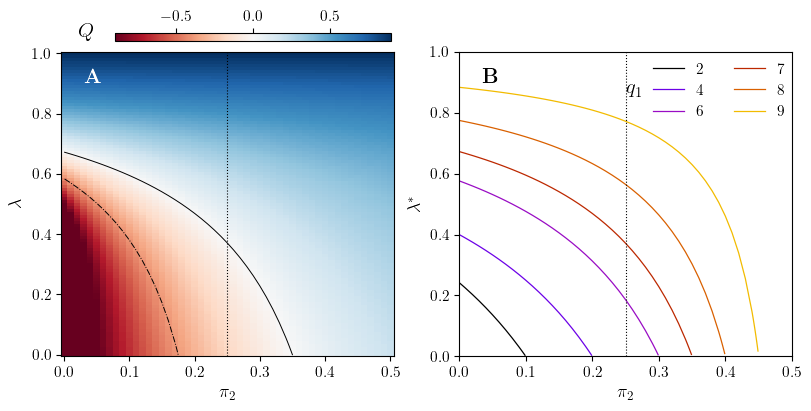

In [40]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

x = 2
q1, q2, pi1 = 7, 10, 0.25
fsMesh = np.load(f'{path}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}_Amp_pi20_l1.npz')
Qmesh = fsMesh['fs'][2] - x*fsMesh['fs'][1]

fig, ax = plt.subplots(1,2,figsize=(8, 4), constrained_layout=True)

# maxval = np.max(abs(Qmesh))
maxval = np.max(Qmesh)
zLim = [-maxval, maxval]
im = ax[0].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, cmap='RdBu', shading='nearest', vmin=zLim[0], vmax=zLim[1], rasterized=True)
fig.colorbar(im, ax=ax[0], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
for x,ls in zip([1, 2], ['-.', '-']):
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    # tline = tline.query('pi2 >= 0.005')
    tline = tline.rename(columns={'lambda':'l'})
    i_last_pi2 = tline.query('l != l').iloc[0].name
    tline.at[i_last_pi2, 'l'] = 0.0
    ax[0].plot(tline['pi2'], tline['l'], color='xkcd:black', lw=0.7, ls=ls)

ax[0].axvline(pi1, ls=':', color='xkcd:black', lw=0.8)
ax[0].set_xlabel('$\pi_{2}$')
ax[0].set_ylabel('$\lambda$')
fig.text(0.09, 0.92, '$Q$')


q1s, q2 = [2,4,6,7,8,9], 10
colors = plt.cm.gnuplot(np.linspace(0,0.9,len(q1s)))
x = 2
for q1,c in zip(q1s, colors):
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    ax[1].plot(tline['pi2'], tline['lambda'], color=c, lw=0.9, label=f'{q1}')
ax[1].set(xlabel=r'$\pi_{2}$', ylabel=r'$\lambda^*$', xlim=(0,0.5), ylim=(0,1)) 
# ax[1].legend(title=r'$q_1$', loc=(0.565,0.7), fontsize=11, title_fontsize=12, ncols=2, frameon=False)
ax[1].legend(loc=(0.565,0.76), fontsize=11, title_fontsize=12, ncols=2, frameon=False)
fig.text(0.775, 0.78, r'$q_1$')
ax[1].axvline(pi1, ls=':', color='xkcd:black', lw=0.8)

ax[0].text(0.07,0.9, r'$\textbf{A}$', color='xkcd:white', transform=ax[0].transAxes)
ax[1].text(0.07,0.9, r'$\textbf{B}$', transform=ax[1].transAxes)

fig.savefig(f'Q_cmap_and_Tlines_asym_fix_pi1_q2_{q2}_pi1_{pi1}.pdf')